## Day 1

In [416]:
### Set environment ###

import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

### Import January 2019 Flight Data, Airline Names, Airport Names ###

df1 = pd.read_csv('data/1-2019.zip')
df2 = pd.read_csv('data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_1.csv')
airline_names_df = pd.read_csv('data/Airline Name Codes.csv')
airport_origin_names_df = pd.read_csv('data/Airport Origin Name Codes.csv')
airport_destination_names_df = pd.read_csv('data/Airport Destination Name Codes.csv')
days_df = pd.read_csv('data/Days_of_the_Week.csv')

# ### OPTIONAL: Show Columns In Imported Flight Dataset ##
# for col in df1.columns:
#     print(col)

    
### Create Useful Dataframes ###

df_state = df2[['OriginState',
                'OriginStateName',
                'DestState',
                'DestStateName']]
df_select = df1[['OP_UNIQUE_CARRIER',
              'DAY_OF_WEEK',
              'ORIGIN',
              'DEST',
              'DEP_DELAY',
              'ARR_DELAY',
              'CANCELLED',
              'DIVERTED',
              'CRS_ELAPSED_TIME',
              'DISTANCE']]
df_few = pd.concat([df_select, df_state], axis=1)
merged_df = pd.merge(df_few,airline_names_df, on='OP_UNIQUE_CARRIER')
merged_df = pd.merge(merged_df,airport_origin_names_df, on='ORIGIN')
merged_df = pd.merge(merged_df,airport_destination_names_df, on='DEST')
merged_df = pd.merge(merged_df,days_df, on='DAY_OF_WEEK')
#merged_df = pd.merge(merged_df,df_state)
merged_df = merged_df.rename(columns={"Description_x": "AIRLINE", "ORIGIN": "ORIGIN_CODE", "DEST": "DEST_CODE", "Description_y": "ORIGIN_NAME", "Description": "DEST"})

# ### OPTIONAL: Show Columns In Grouped Dataframe ##
# for col in merged_df.columns:
#     print(col)

#OPTIONAL: merge within a merge: merged_df = pd.merge(pd.merge(df_few,airline_names_df, on='OP_UNIQUE_CARRIER'),airport_names_df, on='ORIGIN')

### Creating grouped and sorted dataframes for plotting ###

grouped_and_sorted_by_airline_df = merged_df.groupby('AIRLINE').mean().sort_values(by=['ARR_DELAY'])
#grouped_and_sorted_by_airline_df
grouped_and_sorted_by_airport_df = merged_df.groupby('ORIGIN_NAME').mean().sort_values(by=['DEP_DELAY'])
#grouped_and_sorted_by_airport_df
grouped_and_sorted_by_day_df = merged_df.groupby('DAY').mean().sort_values(by=['DAY_OF_WEEK'])
#grouped_and_sorted_by_day_df
grouped_by_origin_df = merged_df.groupby(['ORIGIN_NAME','AIRLINE']).mean()
#grouped_by_origin_df

airport_code_list = list(merged_df.groupby('ORIGIN_CODE').mean().index)
airline_list = list(merged_df.groupby('AIRLINE').mean().index)


In [394]:
#Merge with state dataframe

In [418]:
### Commands to import 2019 data month by month ###

# df1 = pd.read_csv('data/1-2019.csv')
# df2 = pd.read_csv('data/2-2019.csv')
# df3 = pd.read_csv('data/3-2019.csv')
# df4 = pd.read_csv('data/4-2019.csv')
# df5 = pd.read_csv('data/5-2019.csv')
# df6 = pd.read_csv('data/6-2019.csv')
# df7 = pd.read_csv('data/7-2019.csv')
# df8 = pd.read_csv('data/8-2019.csv')
# df9 = pd.read_csv('data/9-2019.csv')
# df10 = pd.read_csv('data/10-2019.csv')
# df11 = pd.read_csv('data/11-2019.csv')
# df12 = pd.read_csv('data/12-2019.csv')

In [419]:
### Resource-Consuming Pairplot ###

#sns.pairplot(df_few)

<BarContainer object of 17 artists>

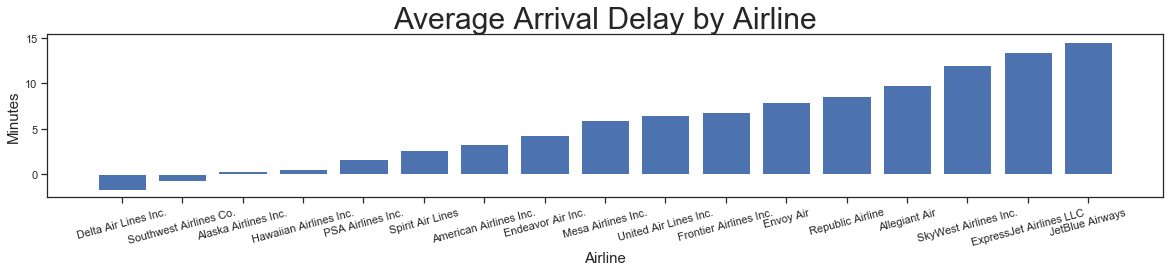

In [420]:
### Bar Graph Of Airlines Sorted By Average Arrival Delay ###

plt.figure(figsize=(20, 3))
plt.xticks(rotation=15)
plt.title('Average Arrival Delay by Airline',fontsize=30)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Minutes',fontsize=15)
plt.bar(grouped_and_sorted_by_airline_df['ARR_DELAY'].index, grouped_and_sorted_by_airline_df['ARR_DELAY'].values)
#plt.savefig('images/Average_Arrival_Delay_by_Airline.png')

## Day Two


<BarContainer object of 346 artists>

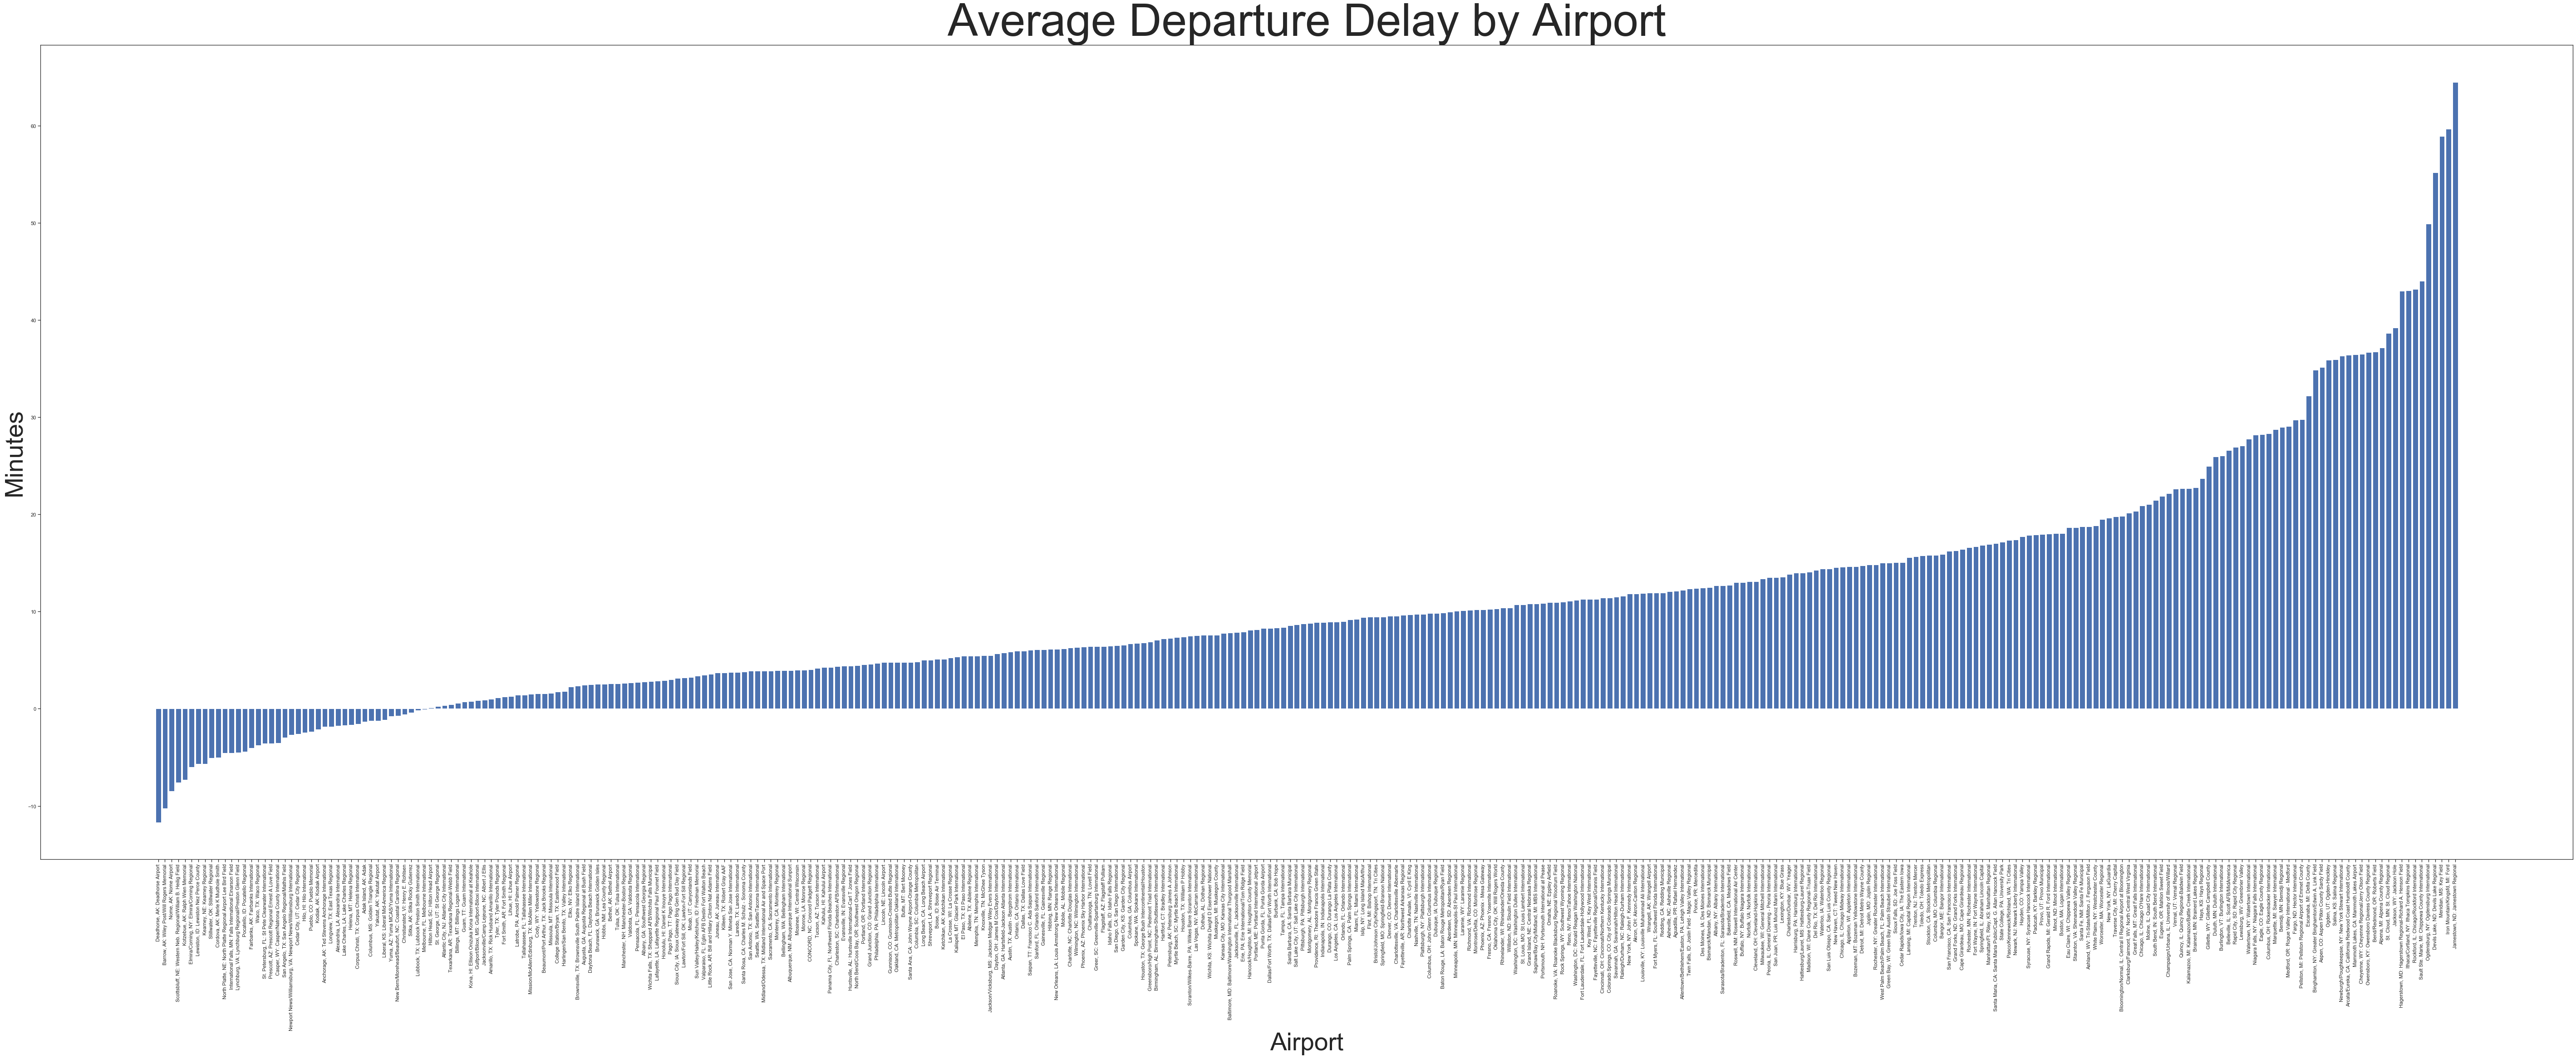

In [421]:
plt.figure(figsize=(100, 33))
plt.xticks(rotation=90)
plt.title('Average Departure Delay by Airport',fontsize=100)
plt.xlabel('Airport',fontsize=55)
plt.ylabel('Minutes',fontsize=55)
plt.bar(grouped_and_sorted_by_airport_df['DEP_DELAY'].index, grouped_and_sorted_by_airport_df['DEP_DELAY'].values)
#plt.savefig('images/Average_Departure_Delay_by_Airport.png')

In [422]:
grouped_and_sorted_by_airport_df.tail(2)

,DAY_OF_WEEK,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE
ORIGIN_NAME,,,,,,,
"Iron Mountain/Kingsfd, MI: Ford",3.758621,59.666667,46.982456,0.017241,0.000000,90.448276,297.500000
"Jamestown, ND: Jamestown Regional",3.916667,64.480000,63.094595,0.107143,0.011905,74.238095,263.833333


<BarContainer object of 30 artists>

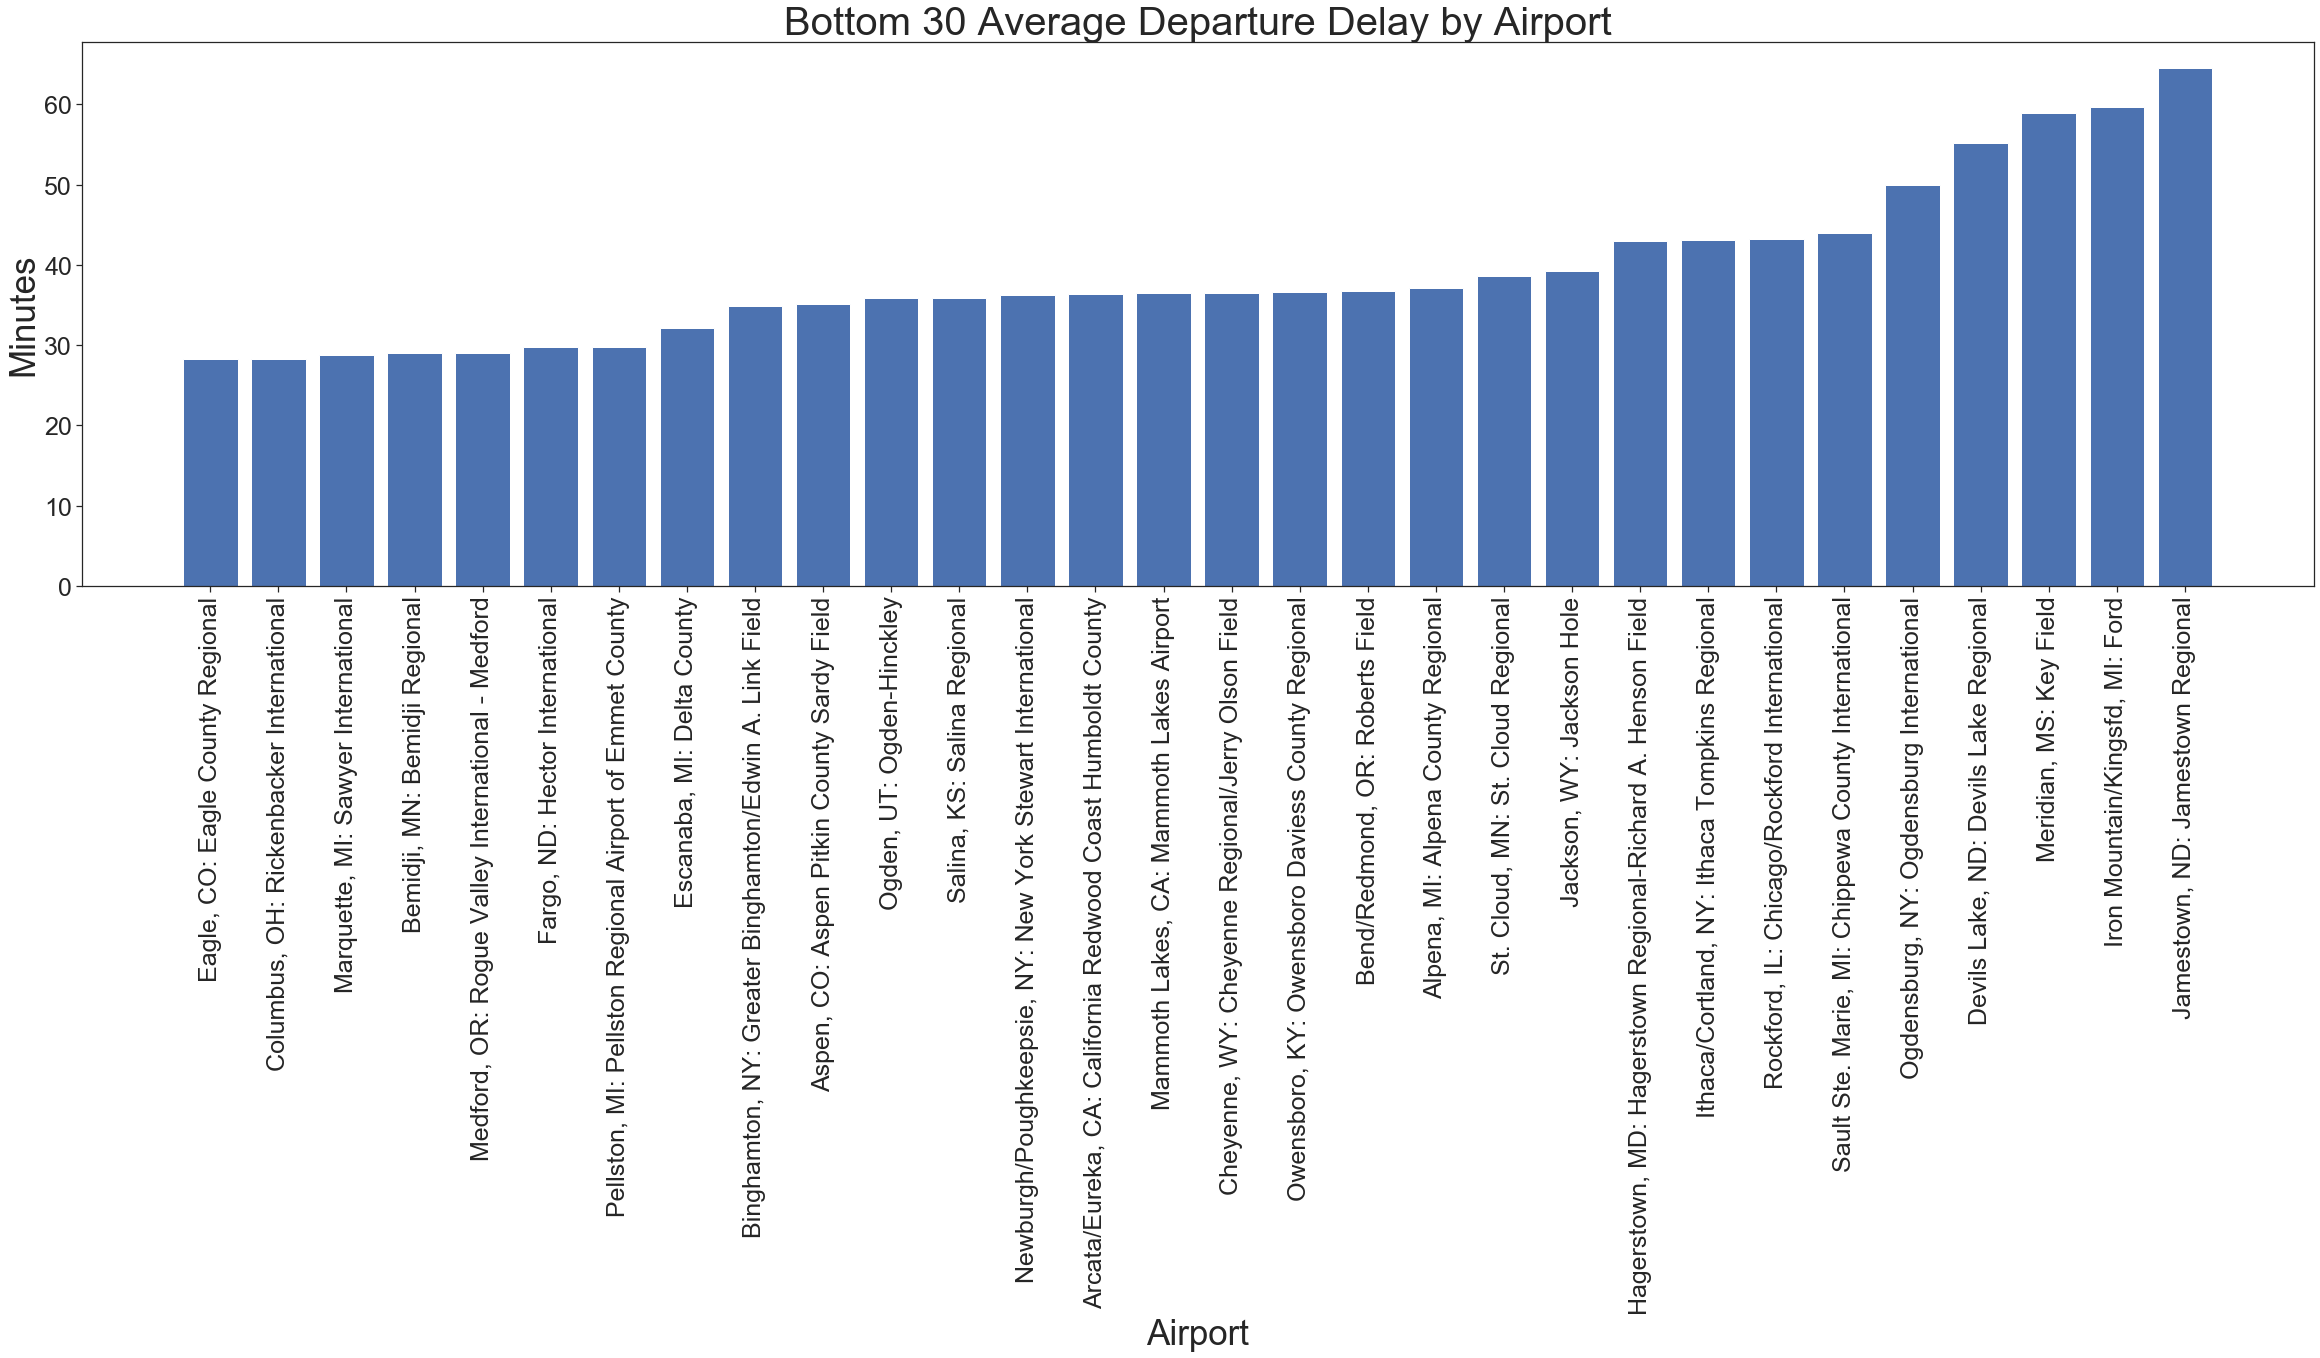

In [423]:
plt.figure(figsize=(40, 10))
plt.xticks(rotation=90)
plt.title('Bottom 30 Average Departure Delay by Airport',fontsize=40)
plt.xlabel('Airport',fontsize=35)
plt.ylabel('Minutes',fontsize=35)
plt.tick_params(labelsize=25)
plt.bar(grouped_and_sorted_by_airport_df.tail(30)['DEP_DELAY'].index, grouped_and_sorted_by_airport_df.tail(30)['DEP_DELAY'].values)
#plt.savefig('images/Bottom_30_Average_Departure_Delay_by_Airport.png')

<BarContainer object of 30 artists>

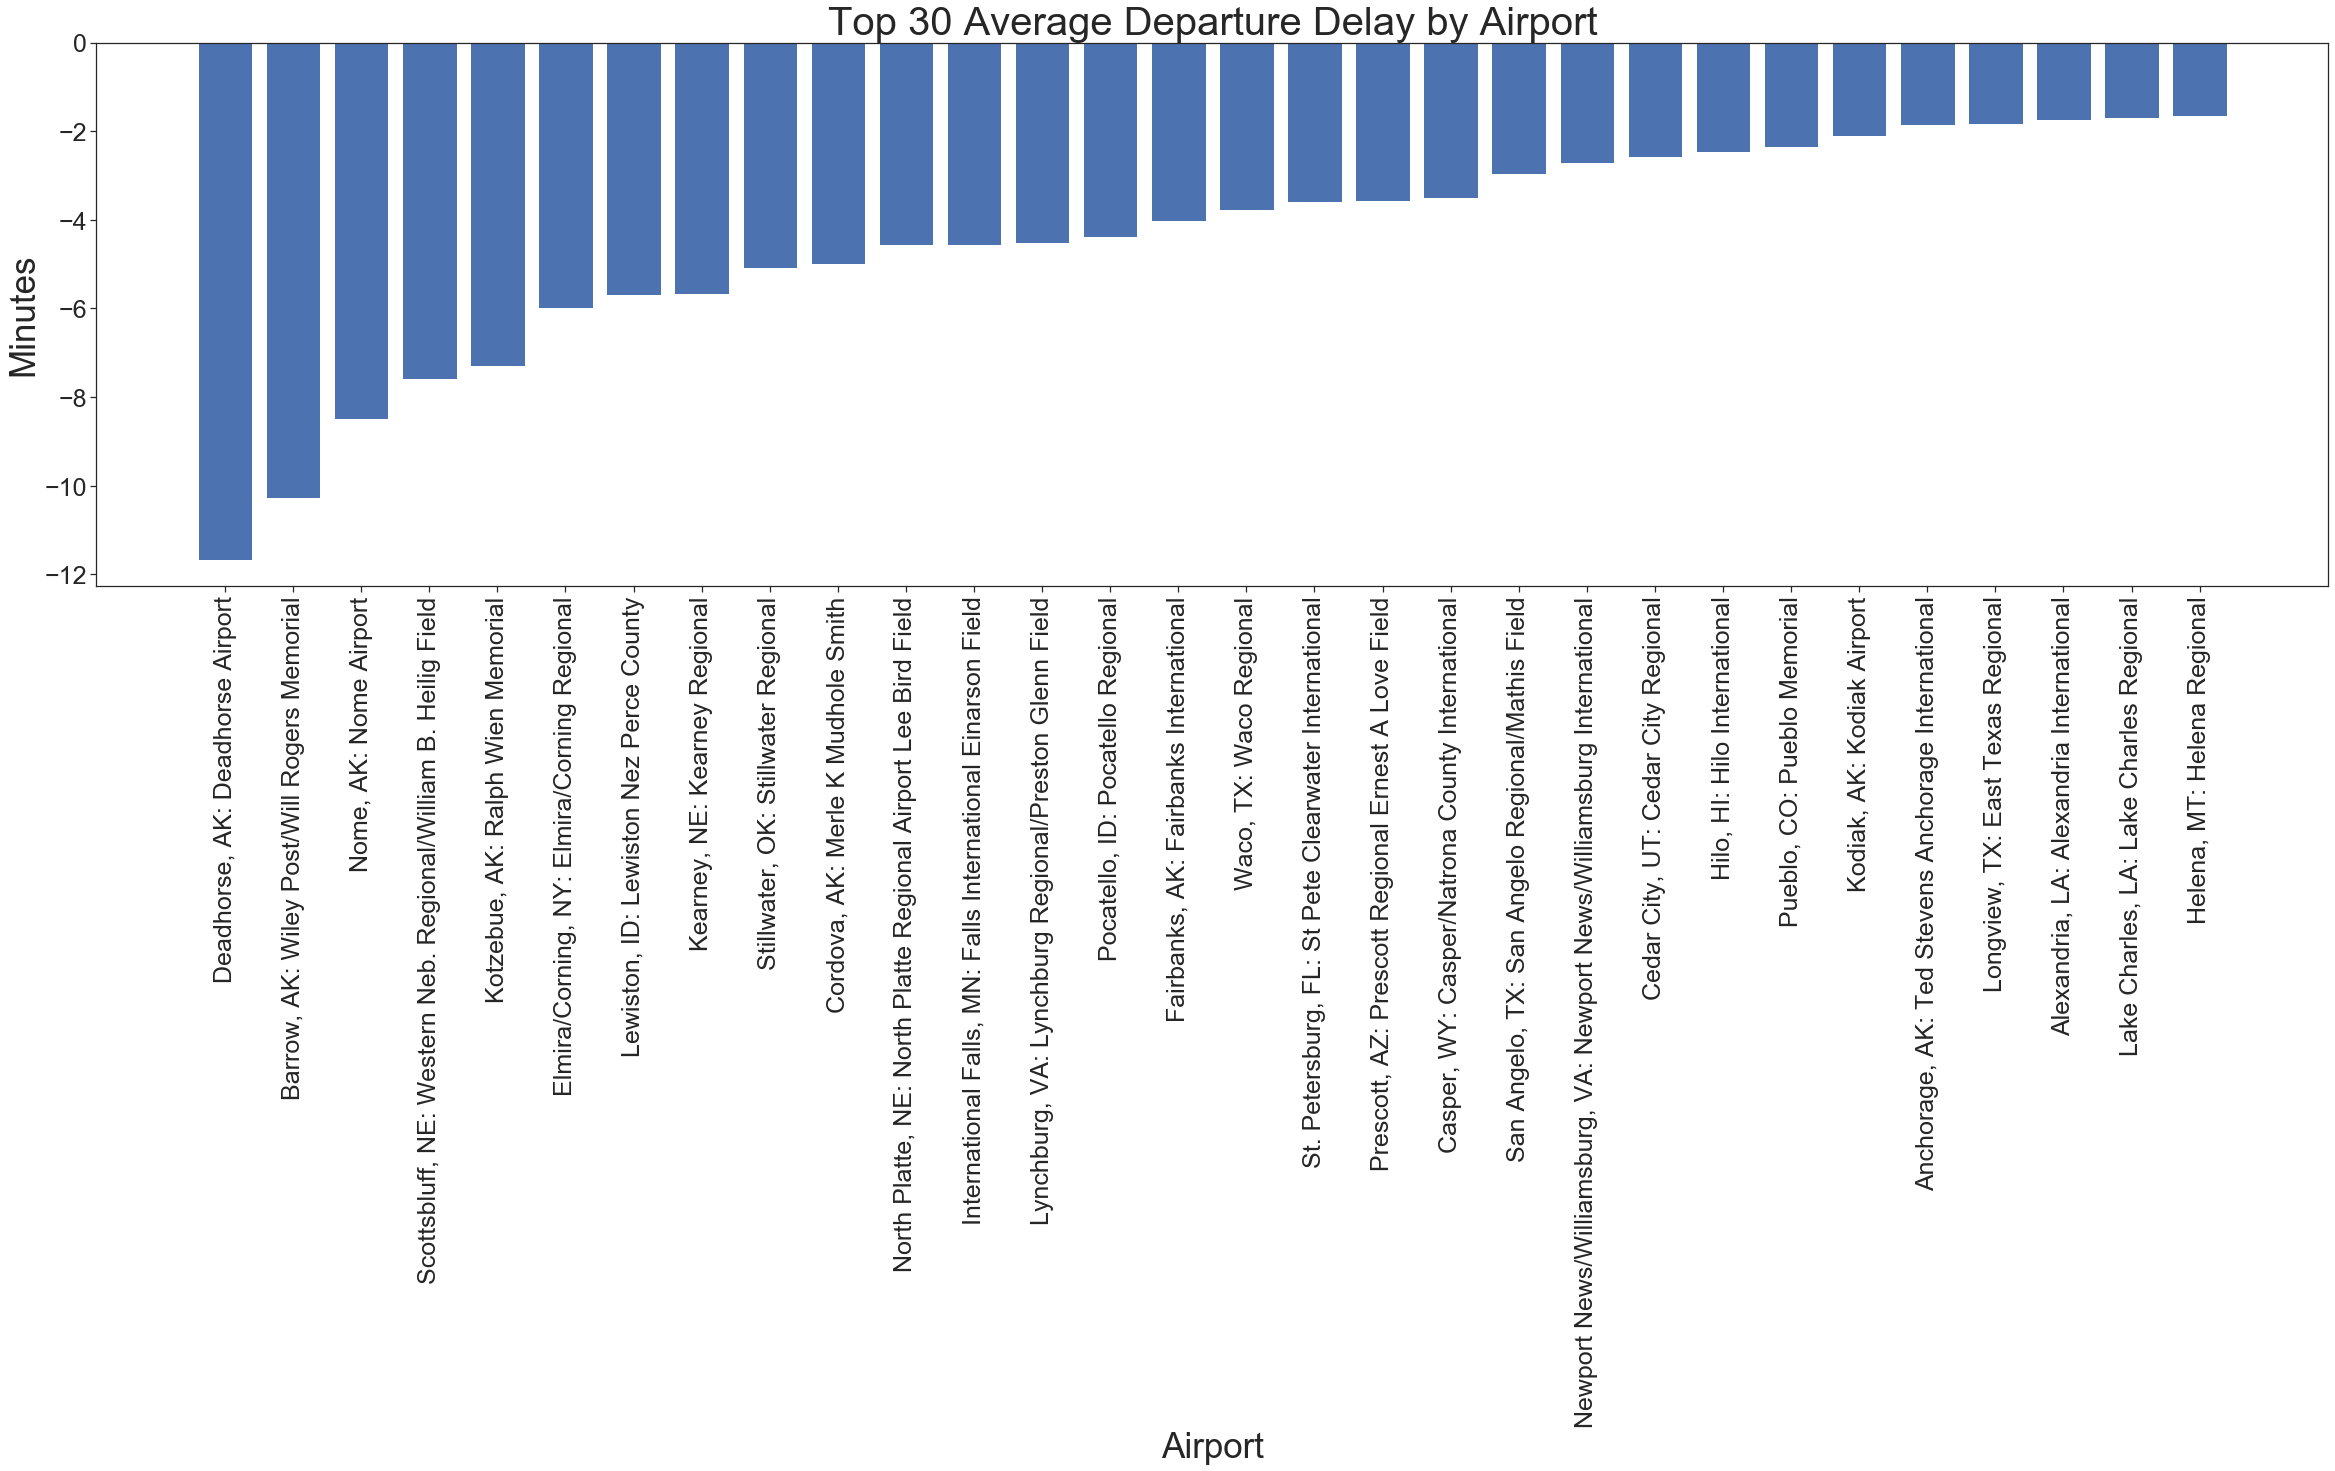

In [424]:
plt.figure(figsize=(40, 10))
plt.xticks(rotation=90)
plt.title('Top 30 Average Departure Delay by Airport',fontsize=40)
plt.xlabel('Airport',fontsize=35)
plt.ylabel('Minutes',fontsize=35)
plt.tick_params(labelsize=25)
plt.bar(grouped_and_sorted_by_airport_df.head(30)['DEP_DELAY'].index, grouped_and_sorted_by_airport_df.head(30)['DEP_DELAY'].values)
#plt.savefig('images/Top_30_Average_Departure_Delay_by_Airport.png')

<BarContainer object of 7 artists>

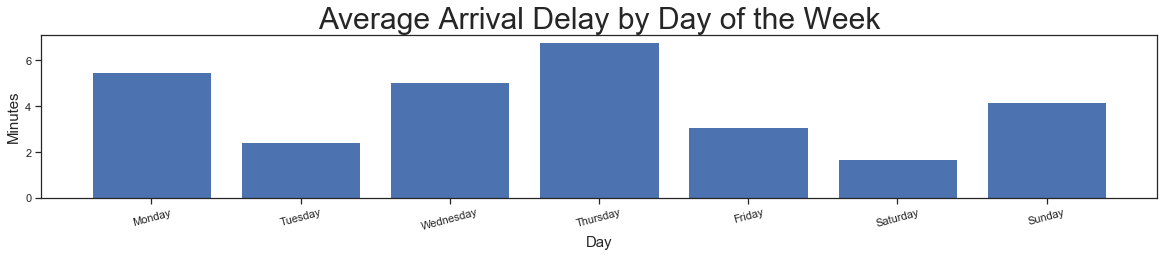

In [425]:
### Bar Graph Of Days of the Week Sorted By Average Arrival Delay ###

plt.figure(figsize=(20, 3))
plt.xticks(rotation=15)
plt.title('Average Arrival Delay by Day of the Week',fontsize=30)
plt.xlabel('Day',fontsize=15)
plt.ylabel('Minutes',fontsize=15)
plt.bar(grouped_and_sorted_by_day_df['ARR_DELAY'].index, grouped_and_sorted_by_day_df['ARR_DELAY'].values)
#plt.savefig('images/Average_Arrival_Delay_by_Day.png')

## Day 3

In [426]:
### Function to return the departure averages of the airlines of the given airport ###

def airline_mean_dep_ratings(airport):
    """Returns the departure averages given an airport as input

    Parameters
    ----------
    airport : str
        The airport can be the airport code or the full name of the airport, but it must be exact. 

    Returns
    -------
    pandas series of the departure averages of each airline that flys out of that airport
    """
    if airport in merged_df['ORIGIN_CODE'].unique() or airport in merged_df['ORIGIN_NAME'].unique():
        if len(airport) == 3:
            return merged_df.groupby(['ORIGIN_CODE','AIRLINE']).mean().loc[airport]['DEP_DELAY']
        return merged_df.groupby(['ORIGIN_NAME','AIRLINE']).mean().loc[airport]['DEP_DELAY']
    return "Not a valid entry, please use the 3-character airport code or the exact name. The list of valid airport names can be found here: https://transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time"
    
    #another way to write it:
    #airline_delay_for_airport_x(airport):
    #origin_code_df = merged_df[merged_df['ORIGIN_CODE']==airport]
    #return origin_code_df.groupby('AIRLINE').mean()['DEP_DELAY']

airline_mean_dep_ratings('JFK')

AIRLINE
Alaska Airlines Inc.       7.214118
American Airlines Inc.     7.228513
Delta Air Lines Inc.       9.165809
Endeavor Air Inc.         12.476415
Envoy Air                  8.539446
Hawaiian Airlines Inc.    33.548387
JetBlue Airways           14.483670
PSA Airlines Inc.          8.557143
Republic Airline          14.296167
SkyWest Airlines Inc.     31.856230
Name: DEP_DELAY, dtype: float64

<BarContainer object of 346 artists>

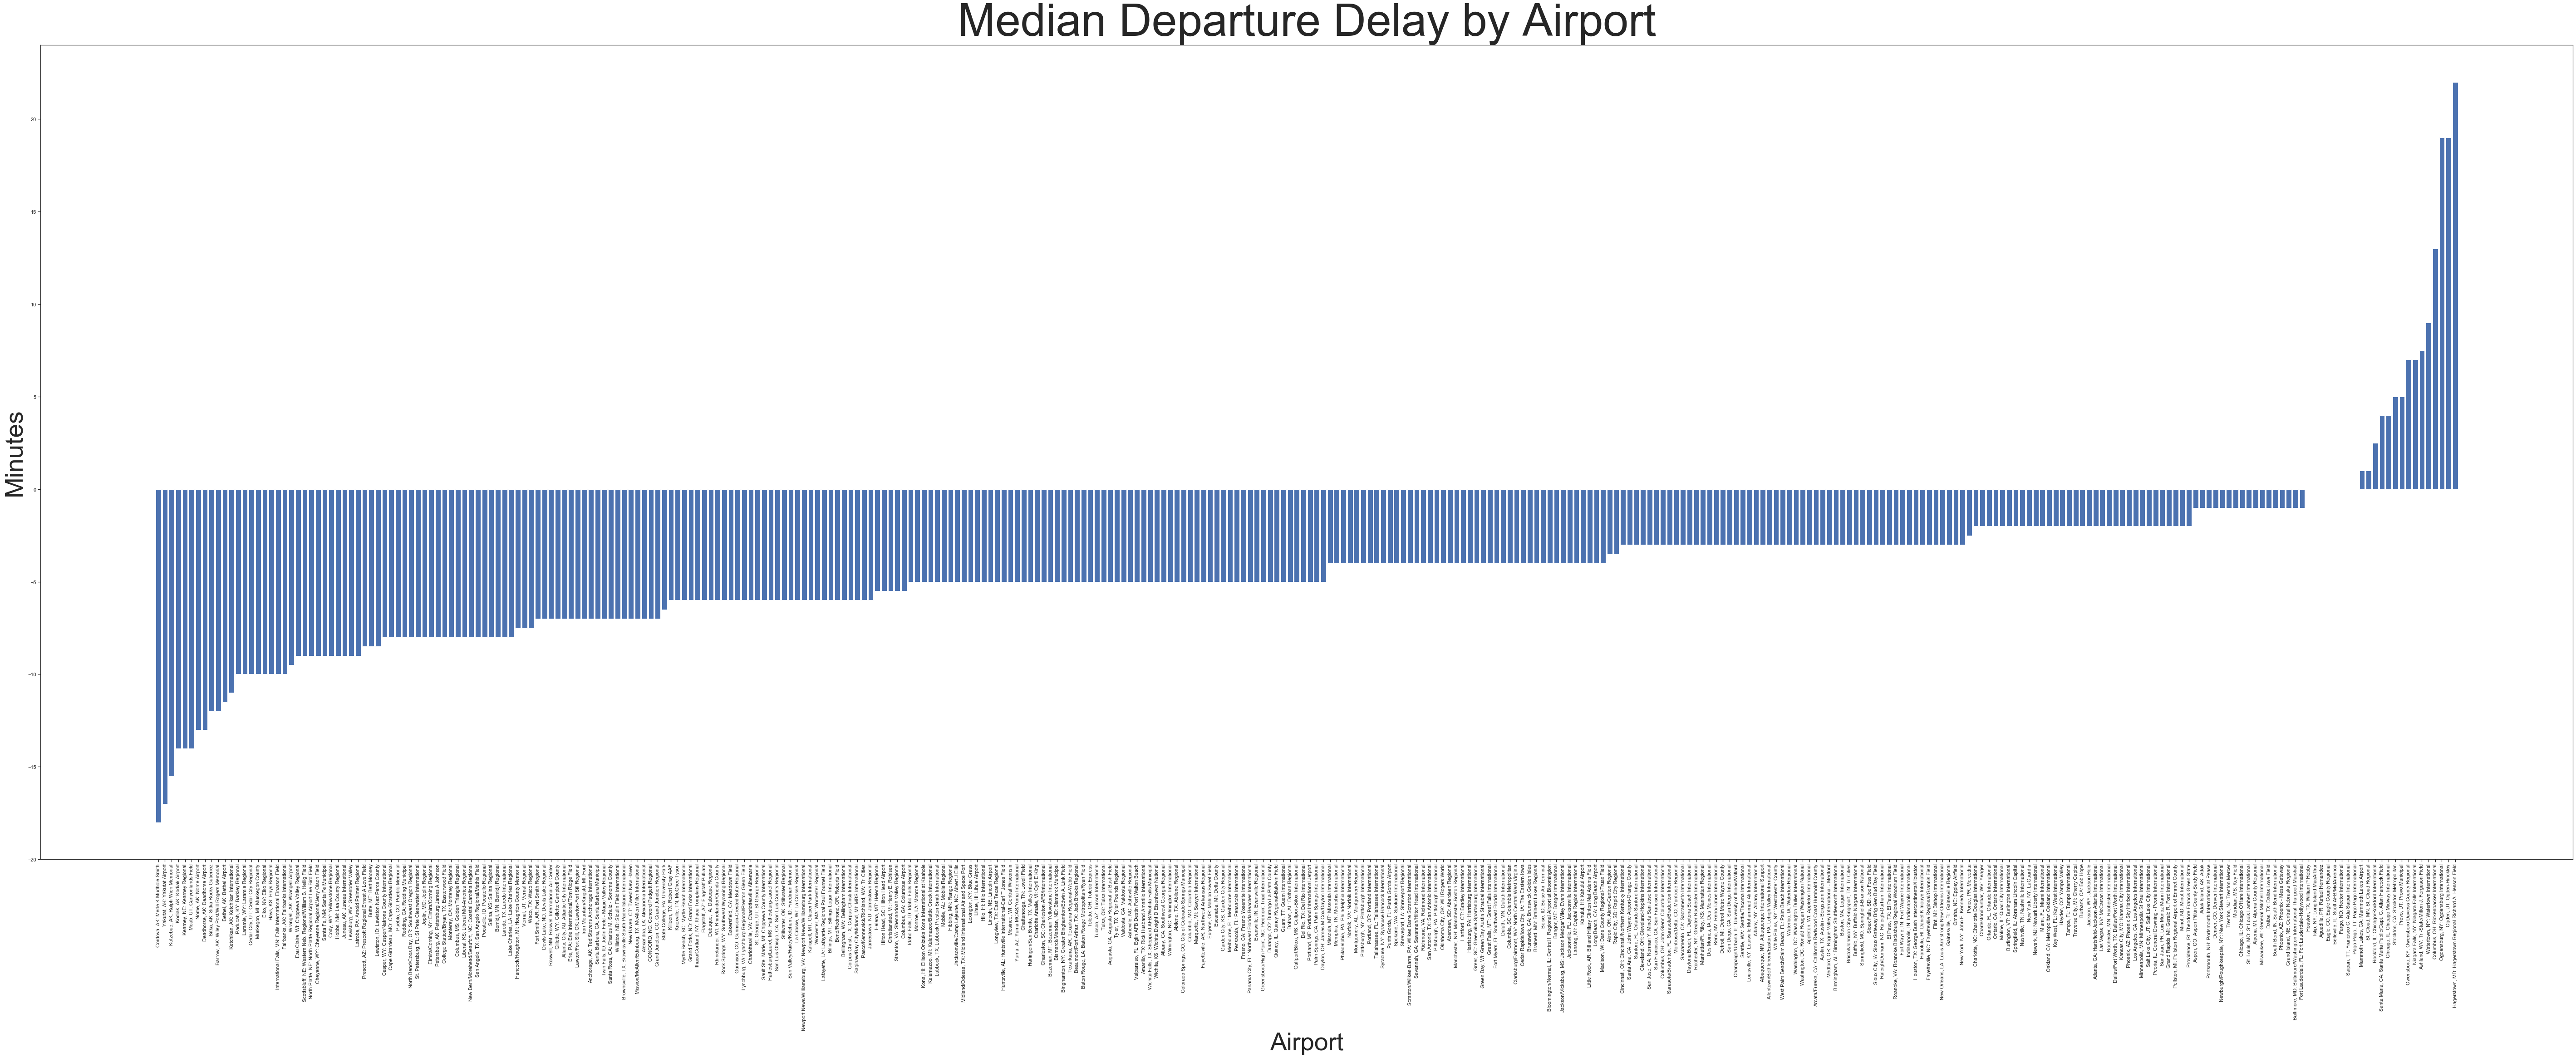

In [354]:
### Median Departure Delay by Airport ###

plt.figure(figsize=(100, 33))
plt.xticks(rotation=90)
plt.title('Median Departure Delay by Airport',fontsize=100)
plt.xlabel('Airport',fontsize=55)
plt.ylabel('Minutes',fontsize=55)
plt.bar(merged_df.groupby('ORIGIN_NAME').median().sort_values(by=['DEP_DELAY'])['DEP_DELAY'].index, merged_df.groupby('ORIGIN_NAME').median().sort_values(by=['DEP_DELAY'])['DEP_DELAY'].values)
#plt.savefig('images/Median_Departure_Delay_by_Airport.png')

In [372]:
### Function to get rows of a specific airline ##

def df_by_airline(airline_name):
    return merged_df[merged_df['AIRLINE']==airline_name]
#df_by_airline('Southwest Airlines Co.')


In [373]:
### Function to get rows of a specific origin airport ###

def df_by_origin_airport(airport_name):
    return merged_df[merged_df['ORIGIN_CODE']==airport_name]
#df_by_origin_airport('MCI')

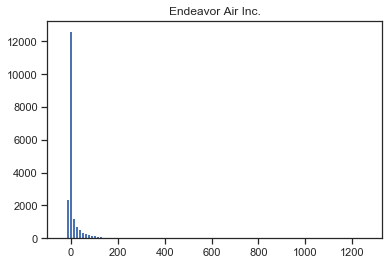

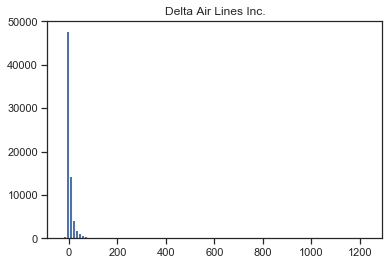

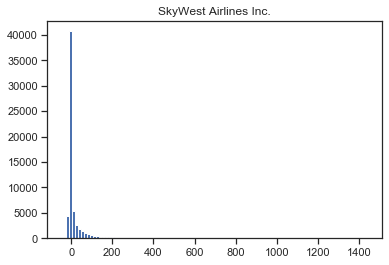

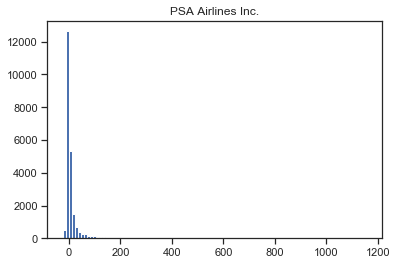

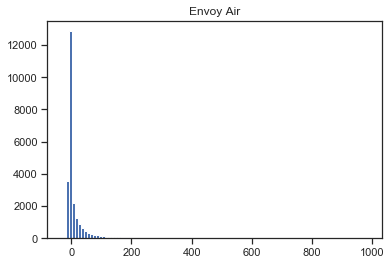

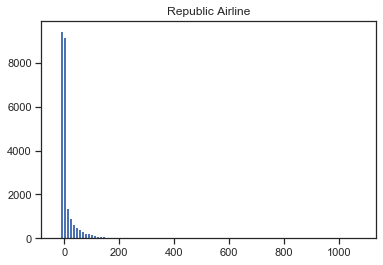

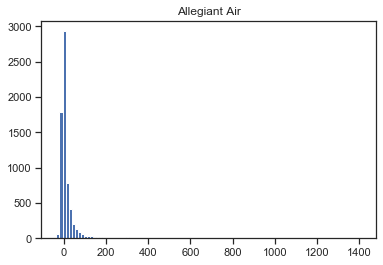

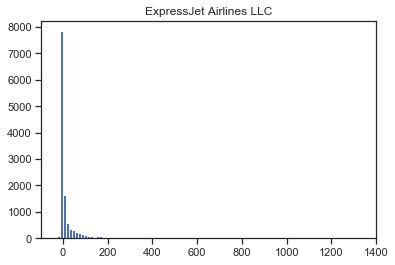

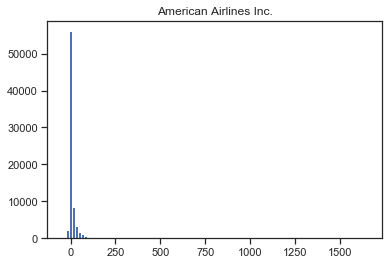

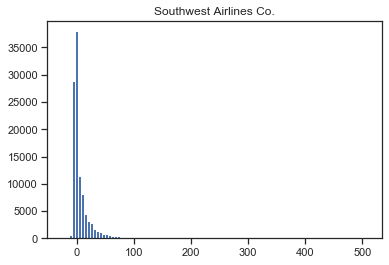

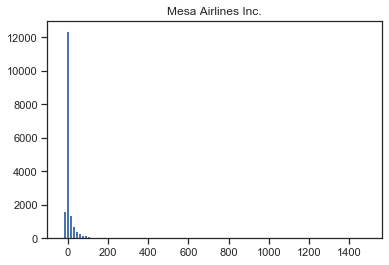

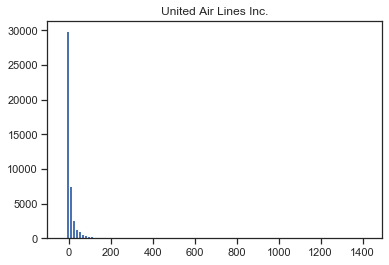

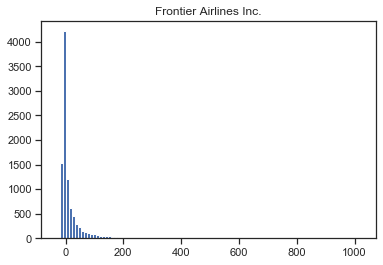

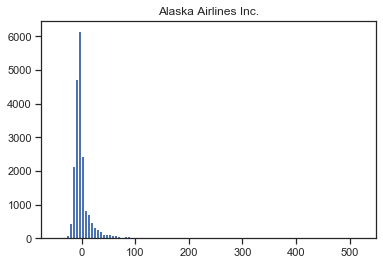

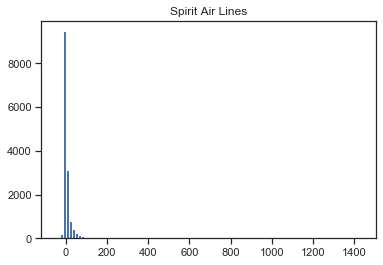

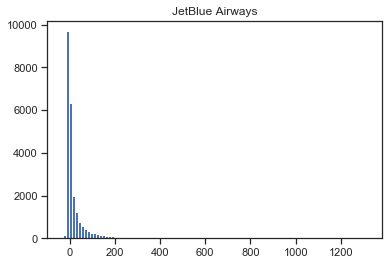

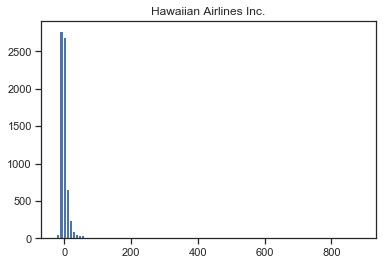

In [263]:
### Histograms of each airline's departure delays ###

for airline in airline_list:
    fig = plt.figure()
    plt.title(airline)
    plt.hist(df_by_airline(airline)['DEP_DELAY'],bins=100)

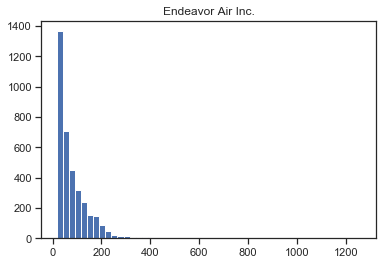

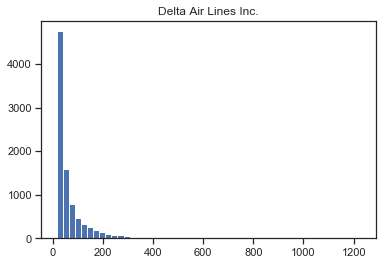

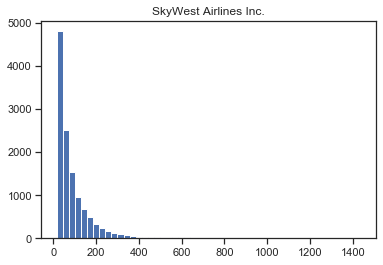

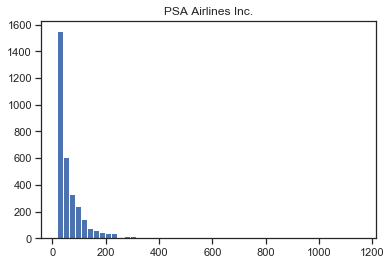

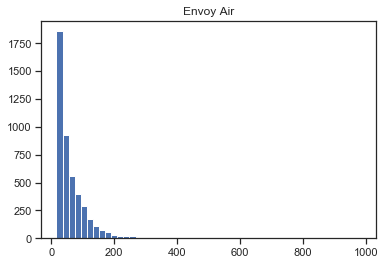

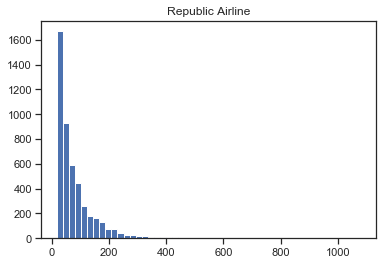

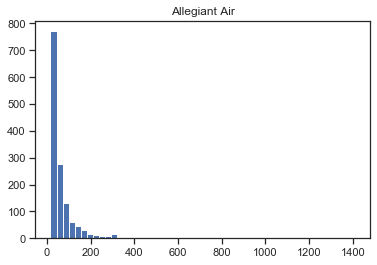

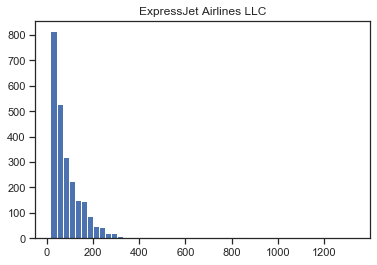

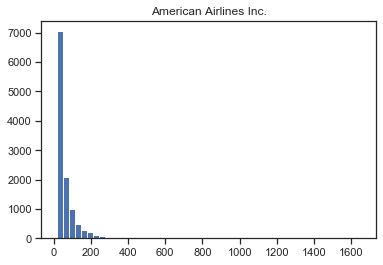

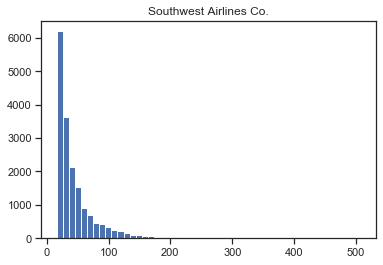

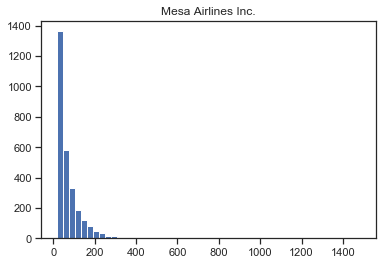

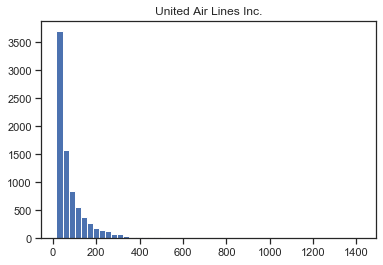

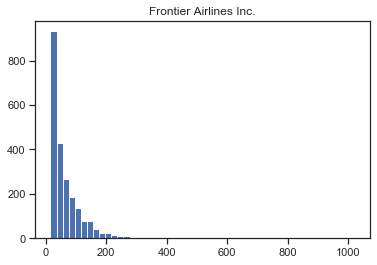

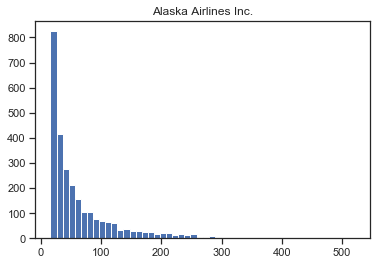

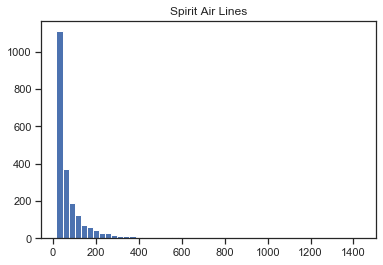

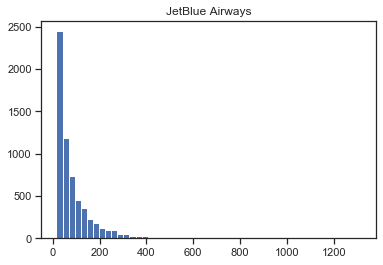

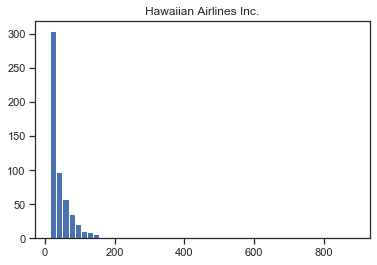

In [364]:
### Histograms of each airline's departure delays more than 15 minutes

for airline in airline_list:
    fig = plt.figure()
    plt.title(airline)
    plt.hist(merged_df[(merged_df['AIRLINE']==airline)&(merged_df['DEP_DELAY']>15)]['DEP_DELAY'],bins=50)
    
    

<BarContainer object of 17 artists>

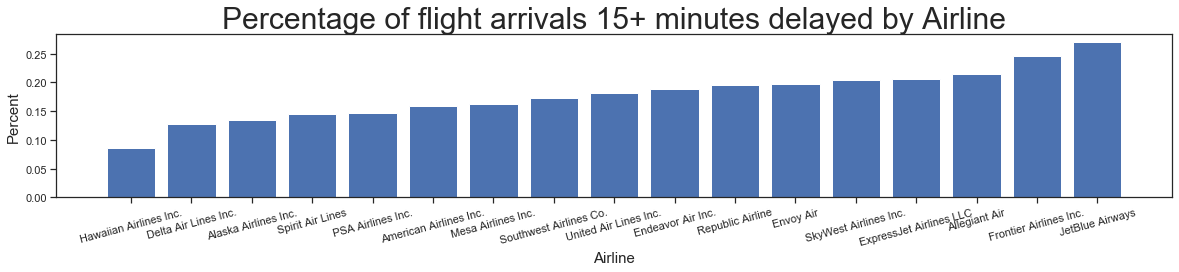

In [365]:
### Creating table and bar graph of % of flights that are 15+ minutes delayed ###

percet_15_min_delayed = (merged_df[(merged_df['DEP_DELAY']>14)].groupby('ORIGIN_CODE').count()['DEP_DELAY'] / merged_df.groupby('ORIGIN_CODE').count()['DEP_DELAY']).sort_values()
percet_15_min_delayed

### Bar graph of % of flights that are 15+ minutes delayed by Airport ###

for airport in 
    plt.figure(figsize=(20, 3))
    plt.xticks(rotation=15)
    plt.title(f"Percentage of {airport}'s flight departures 15+ minutes delayed by Airport",fontsize=30)
    plt.xlabel('Airport',fontsize=15)
    plt.ylabel('Percent',fontsize=15)
    plt.bar(percet_15_min_delayed.index, percet_15_min_delayed.values)
    #plt.savefig('images/Percent_of_15+_Minute_Arrival_Delay_by_Airline.png')

In [ ]:
### Bar graph of % of flights that are 15+ minutes delayed by Airline ###

for airline in airline_list:
    fig = plt.figure()
    plt.title(airline)
    plt.hist(merged_df[(merged_df['AIRLINE']==airline)&(merged_df['DEP_DELAY']>15)]['DEP_DELAY'],bins=50)


<BarContainer object of 17 artists>

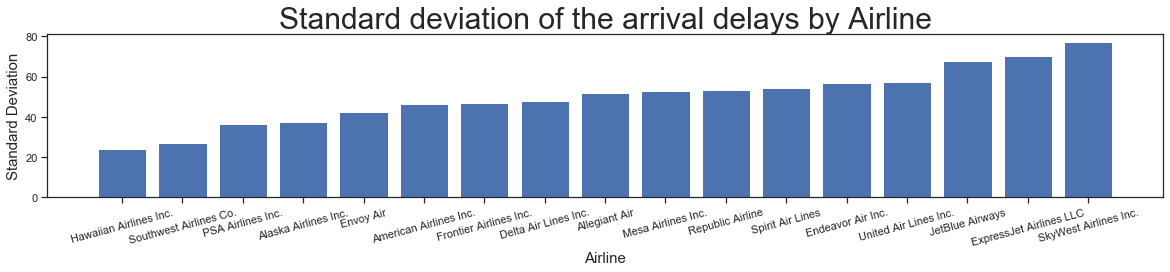

In [306]:
### Creating table of the standard deviation of the arrival delays ###

std_airline_delays_df = merged_df.groupby('AIRLINE').std().sort_values(by=['ARR_DELAY'])['ARR_DELAY']

### Bar graph of the standard deviation of the arrival delays ###

plt.figure(figsize=(20, 3))
plt.xticks(rotation=15)
plt.title('Standard deviation of the arrival delays by Airline',fontsize=30)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Standard Deviation',fontsize=15)
plt.bar(std_airline_delays_df.index, std_airline_delays_df.values)
#plt.savefig('images/Standard_Deviation_Arrival_Delay_by_Airline.png')